In [1]:
from optimizer import *
from calibrator import *
from evaluator import *

In [9]:
#nazwa modelu
name = "my_model_27"

In [10]:
#ładowanie modelu
onnx_model = onnx.load(name + ".onnx")

In [11]:
#optymalizacja modelu
optimized_model_path = optimize_fp_model(name + ".onnx")


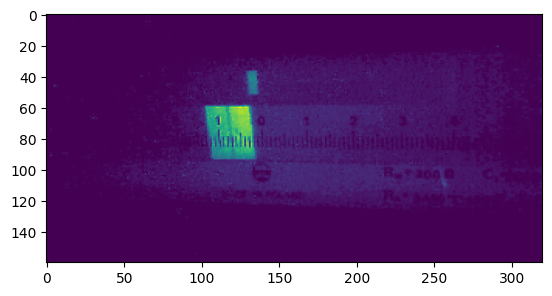

In [12]:
#ładowanie danych
import matplotlib.pyplot as plt 
import pickle
test_images = None
with open("test_imgaes.pkl", 'rb') as f:
    (test_images) = pickle.load(f)
test_labels = None
with open("test_labels.pkl", 'rb') as f:
    (test_labels) = pickle.load(f)
calib_dataset = test_images
plt.imshow(test_images[0])
plt.savefig('test.png')
pickle_file_path = f'{name}_calib.pickle'

In [13]:
model_proto = onnx.load(optimized_model_path)
print('Generating the quantization table:')

Generating the quantization table:


In [14]:
calib = Calibrator('int16', 'per-tensor', 'minmax')

In [15]:
calib.set_providers(['CPUExecutionProvider'])

In [16]:
calib.generate_quantization_table(model_proto,calib_dataset, pickle_file_path)

In [17]:
#generowanie współczynników
calib.export_coefficient_to_cpp(model_proto, pickle_file_path, 'esp32', '.', f'{name}_coefficient', True)

Converting coefficient to int16 per-tensor quantization for esp32
Exporting finish, the output files are: ./my_model_27_coefficient.cpp, ./my_model_27_coefficient.hpp

Quantized model info:
model input name: args_0, exponent: -7
Reshape layer name: sequential_1/conv2d/BiasAdd__6, output_exponent: -7
Conv layer name: sequential_1/conv2d/BiasAdd, output_exponent: -7
MaxPool layer name: sequential_1/max_pooling2d/MaxPool, output_exponent: -7
Conv layer name: sequential_1/conv2d_1/BiasAdd, output_exponent: -7
MaxPool layer name: sequential_1/max_pooling2d_1/MaxPool, output_exponent: -7
Conv layer name: sequential_1/conv2d_2/BiasAdd, output_exponent: -7
MaxPool layer name: sequential_1/max_pooling2d_2/MaxPool, output_exponent: -7
Conv layer name: sequential_1/conv2d_3/BiasAdd, output_exponent: -8
MaxPool layer name: sequential_1/max_pooling2d_3/MaxPool, output_exponent: -8
Transpose layer name: sequential_1/max_pooling2d_3/MaxPool__36, output_exponent: -8
Reshape layer name: sequential_1/fl

In [18]:
print('Evaluating the performance on esp32s3:')
eva = Evaluator('int16', 'per-tensor', 'esp32s3')
eva.set_providers(['CPUExecutionProvider'])
eva.generate_quantized_model(model_proto, pickle_file_path)

Evaluating the performance on esp32s3:


117
lab:65
t:14548.0
100:145.48
64:227.3125
128:113.65625
256:56.828125


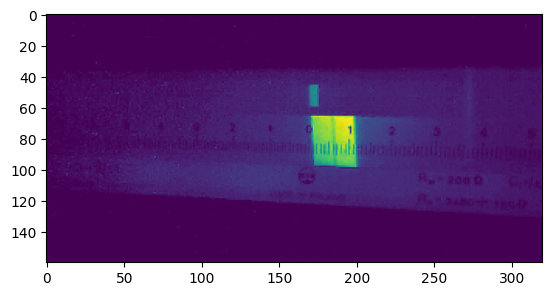

In [25]:
#wynik testowy
from random import choice
idx = choice([i for i in range(len(test_images))])
plt.imshow(test_images[idx])
print(idx)

print(f"lab:{test_labels[idx]}")
t = eva.evalute_quantized_model([test_images[idx]])[0][0][0][0]

print(f"t:{t}")
print(f"100:{t/100}")
print(f"64:{t/64}")
print(f"128:{t/128}")
print(f"256:{t/256}")


In [26]:
#export danych testowych obrazu
for j in test_images[idx]:
    for k in j:
        print(int(k), end=',')
    print()


0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,0,0,0,0,1,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2